<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230325.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis 
* Iterators

In [88]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta
import os
import re
from functools import reduce
from collections import defaultdict
from scipy import stats
from scipy.stats import norm

# Customer Analysis

In [3]:
os.listdir()

['.config',
 'mall_customers.csv',
 'bz_data_analyis.csv',
 'test.csv',
 'sales.csv',
 'mock_sales_data.csv',
 '1_customers_dataset.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'groceries.csv',
 'ab_experiment.csv',
 'online_retail.xlsx',
 'match_result_test.csv',
 'sample-sales-data.csv',
 'cookie_cats.csv',
 '1_order_payments_dataset.csv',
 'scanner_data.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'ecommerce-data.csv',
 'sales_data_with_stores.csv',
 '1_orders_dataset.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'online_retail_II.xlsx',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'app_wau.csv',
 'sales_vs_discount.csv',
 'lead_conversion.csv',
 'sample_data']

In [6]:
df = pd.read_csv('bz_data_analyis.csv')
df['order_date'] = pd.to_datetime(df['order_date'], format = '%m/%d/%y %H:%M')
df['date'] = df.order_date.to_numpy().astype('datetime64[D]')
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df['cat'] = df['product'].str.split(' ').str[-1]
df.head()

<ipython-input-6-9eefab714cc2>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.


,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,date,week,cat
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,2019-12-30 00:01:00,0,1,1,2019-12-30,2019-12-30,Laptop
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,2019-12-29 07:03:00,7,3,1,2019-12-29,2019-12-23,Machine
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,2019-12-12 18:21:00,18,21,1,2019-12-12,2019-12-09,Cable
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,2019-12-22 15:13:00,15,13,1,2019-12-22,2019-12-16,Monitor
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,2019-12-18 12:38:00,12,38,1,2019-12-18,2019-12-16,Cable


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       185950 non-null  int64         
 1   product           185950 non-null  object        
 2   quantity_ordered  185950 non-null  object        
 3   price_each        185950 non-null  float64       
 4   purchase_address  185950 non-null  object        
 5   month             185950 non-null  int64         
 6   year              185950 non-null  int64         
 7   day               185950 non-null  int64         
 8   city              185950 non-null  object        
 9   code              185950 non-null  object        
 10  sales             185950 non-null  float64       
 11  order_date        185950 non-null  datetime64[ns]
 12  hour              185950 non-null  int64         
 13  minute            185950 non-null  int64         
 14  coun

In [11]:
df['quantity_ordered'].str.contains('[a-zA-Z]', na = True)

0         False
1         False
2         False
3         False
4         False
          ...  
185945     True
185946     True
185947     True
185948     True
185949     True
Name: quantity_ordered, Length: 185950, dtype: bool

In [18]:
df['quantity_ordered'].str.contains('\+')

0         False
1         False
2         False
3         False
4         False
          ...  
185945      NaN
185946      NaN
185947      NaN
185948      NaN
185949      NaN
Name: quantity_ordered, Length: 185950, dtype: object

In [19]:
df['quantity_ordered'] = df['quantity_ordered'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       185950 non-null  int64         
 1   product           185950 non-null  object        
 2   quantity_ordered  185950 non-null  object        
 3   price_each        185950 non-null  float64       
 4   purchase_address  185950 non-null  object        
 5   month             185950 non-null  int64         
 6   year              185950 non-null  int64         
 7   day               185950 non-null  int64         
 8   city              185950 non-null  object        
 9   code              185950 non-null  object        
 10  sales             185950 non-null  float64       
 11  order_date        185950 non-null  datetime64[ns]
 12  hour              185950 non-null  int64         
 13  minute            185950 non-null  int64         
 14  coun

In [21]:
df[df['quantity_ordered'].str.contains('\+')]

,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,date,week,cat
1242,296854,Bose SoundSport Headphones,1+C1273,99.99,"588 West St, San Francisco, CA 94016",12,2019,14,San Francisco (CA),CA,99.99,2019-12-14 00:51:00,0,51,1,2019-12-14,2019-12-09,Headphones


In [30]:
df = df[~df['quantity_ordered'].str.contains('\+')]
df['quantity_ordered'] = df['quantity_ordered'].astype(int)
df.head()

<ipython-input-30-cf48ddb104d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,date,week,cat
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,2019-12-30 00:01:00,0,1,1,2019-12-30,2019-12-30,Laptop
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,2019-12-29 07:03:00,7,3,1,2019-12-29,2019-12-23,Machine
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,2019-12-12 18:21:00,18,21,1,2019-12-12,2019-12-09,Cable
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,2019-12-22 15:13:00,15,13,1,2019-12-22,2019-12-16,Monitor
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,2019-12-18 12:38:00,12,38,1,2019-12-18,2019-12-16,Cable


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185949 entries, 0 to 185949
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       185949 non-null  int64         
 1   product           185949 non-null  object        
 2   quantity_ordered  185949 non-null  int64         
 3   price_each        185949 non-null  float64       
 4   purchase_address  185949 non-null  object        
 5   month             185949 non-null  int64         
 6   year              185949 non-null  int64         
 7   day               185949 non-null  int64         
 8   city              185949 non-null  object        
 9   code              185949 non-null  object        
 10  sales             185949 non-null  float64       
 11  order_date        185949 non-null  datetime64[ns]
 12  hour              185949 non-null  int64         
 13  minute            185949 non-null  int64         
 14  coun

In [32]:
df['rev'] = df['price_each'] * df['quantity_ordered']
df.head()

<ipython-input-32-86afc0fc546f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,date,week,cat,rev
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,2019-12-30 00:01:00,0,1,1,2019-12-30,2019-12-30,Laptop,1700.00
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,2019-12-29 07:03:00,7,3,1,2019-12-29,2019-12-23,Machine,1800.00
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,2019-12-12 18:21:00,18,21,1,2019-12-12,2019-12-09,Cable,35.85
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,2019-12-22 15:13:00,15,13,1,2019-12-22,2019-12-16,Monitor,299.98
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,2019-12-18 12:38:00,12,38,1,2019-12-18,2019-12-16,Cable,11.95


In [71]:
print(min(df['date']))
print(max(df['date']))

2019-01-01 00:00:00
2020-01-01 00:00:00


In [70]:
cnt_rev = df.groupby(['year','month', 'code', 'cat'])['rev'].sum().reset_index(name = 'rev')
cnt_rev = pd.pivot(cnt_rev, index = ['code', 'cat', 'month'], columns = 'year', values = 'rev').reset_index()
cnt_rev = cnt_rev[cnt_rev[2020].notna()]
cnt_rev['ratio'] = [round(a/b*100,2) for a, b in zip(cnt_rev[2020],cnt_rev[2019])]
cnt_rev

year,code,cat,month,2019,2020
0,CA,(4-pack),1,4151.85,2.99
1,CA,(4-pack),2,5123.15,NaN
2,CA,(4-pack),3,6358.62,NaN
3,CA,(4-pack),4,8099.77,NaN
4,CA,(4-pack),5,6853.84,NaN
...,...,...,...,...,...
941,WA,iPhone,8,22400.00,NaN
942,WA,iPhone,9,23100.00,NaN
943,WA,iPhone,10,49700.00,NaN
944,WA,iPhone,11,33600.00,NaN


In [82]:
list_q = {1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4' }
df['q'] = df['month'].apply(lambda x : list_q.get(x,x))
df['year_q'] = df['year'].astype(str) + '_' + df['q']
df.head()

<ipython-input-82-0f603c9a93ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-82-0f603c9a93ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,...,order_date,hour,minute,count,date,week,cat,rev,q,year_q
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,...,2019-12-30 00:01:00,0,1,1,2019-12-30,2019-12-30,Laptop,1700.00,Q4,2019_Q4
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,...,2019-12-29 07:03:00,7,3,1,2019-12-29,2019-12-23,Machine,1800.00,Q4,2019_Q4
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,...,2019-12-12 18:21:00,18,21,1,2019-12-12,2019-12-09,Cable,35.85,Q4,2019_Q4
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,...,2019-12-22 15:13:00,15,13,1,2019-12-22,2019-12-16,Monitor,299.98,Q4,2019_Q4
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,...,2019-12-18 12:38:00,12,38,1,2019-12-18,2019-12-16,Cable,11.95,Q4,2019_Q4


In [84]:
cnt_rev = df.groupby(['year_q','code'])['rev'].sum().reset_index(name = 'cnt')
cnt_rev.head()

,year_q,code,cnt
0,2019_Q1,CA,2733495.69
1,2019_Q1,GA,557535.22
2,2019_Q1,MA,715593.77
3,2019_Q1,ME,83070.58
4,2019_Q1,NY,931885.13


In [85]:
pd.pivot_table(cnt_rev, index = ['code'], columns = ['year_q'], values = 'cnt').reset_index()

year_q,code,2019_Q1,2019_Q2,2019_Q3,2019_Q4,2020_Q1
0,CA,2733495.69,3703764.32,2739559.41,4539803.60,3484.87
1,GA,557535.22,743119.37,552313.02,942664.86,NaN
2,MA,715593.77,937358.65,779181.13,1228417.34,1326.89
3,ME,83070.58,130540.58,97177.30,138984.76,NaN
4,NY,931885.13,1209722.73,959463.39,1564752.95,1340.62
5,OR,368421.86,510732.90,364687.51,627383.86,152.99
6,TX,901715.98,1184078.82,938823.73,1562352.45,2214.93
7,WA,530991.01,701761.88,558598.28,958053.85,149.99


<Axes: xlabel='year_q', ylabel='cnt'>

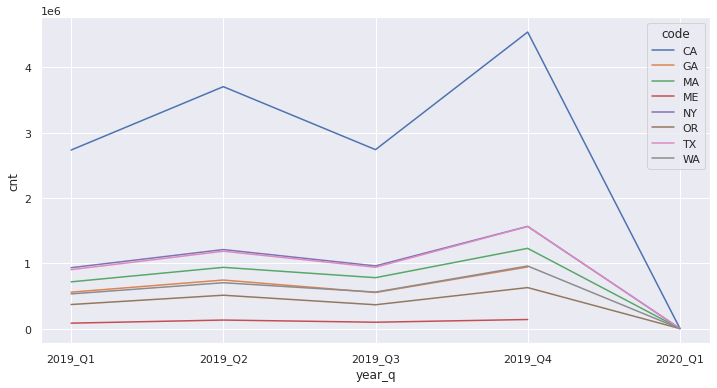

In [98]:
sns.set(rc = {'figure.figsize':[12,6]})
#sns.set(rc = {'figure:figsize':[12,6]})
sns.lineplot(data = cnt_rev, x = 'year_q', y = 'cnt', hue = 'code')

# Iterators

In [99]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [100]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [101]:
{k : [user[k] for user in users] for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}